<a href="https://colab.research.google.com/github/Sitananvor/DL_Practice/blob/main/02_Handwritten_Digits_Classification_CNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library and module

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras

#Preparing DataSet

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"The type of x_train is: {type(x_train)}")
print(f"The type of x_test is: {type(x_test)}")
print()
print(f"len(x_train): {len(x_train)}")
print(f"len(x_test): {len(x_test)}")
print()
print(f"x_train[0].shape: {x_train[0].shape}")
print(f"x_test[0].shape: {x_test[0].shape}")

The type of x_train is: <class 'numpy.ndarray'>
The type of x_test is: <class 'numpy.ndarray'>

len(x_train): 60000
len(x_test): 10000

x_train[0].shape: (28, 28)
x_test[0].shape: (28, 28)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

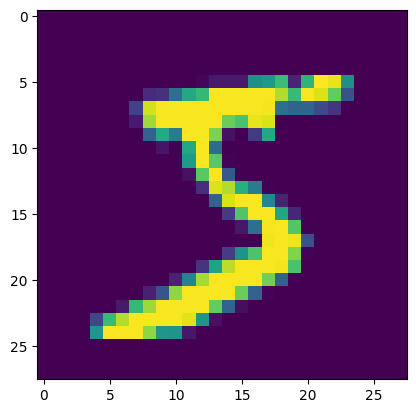

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

In [9]:
#Normalize pixel values to be between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [10]:
print(f"x_train[0].shape: {x_train[0].shape}")
print(f"x_test[0].shape: {x_test[0].shape}")

x_train[0].shape: (28, 28)
x_test[0].shape: (28, 28)


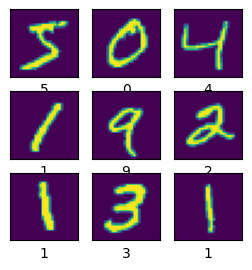

In [11]:
#Verify data
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(3,3))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([]), plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [14]:
#reshape from image data 2D (28x28) to 1D (784)
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

#Train Model

## no hidden layers

In [ ]:
#Very simple neural network with no hidden layers by only use Dense Layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

#Compile (Loss function and Optimizer)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.9620 - accuracy: 0.8391
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1652 - accuracy: 0.8787
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.8054 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.4243 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4512 - accuracy: 0.8859


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Model Evaluation
model.evaluate(x_test_flattened, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 5.0950 - accuracy: 0.9044


[5.0949625968933105, 0.9043999910354614]

In [ ]:
#Predict1
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       2.3416038e-04, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

0

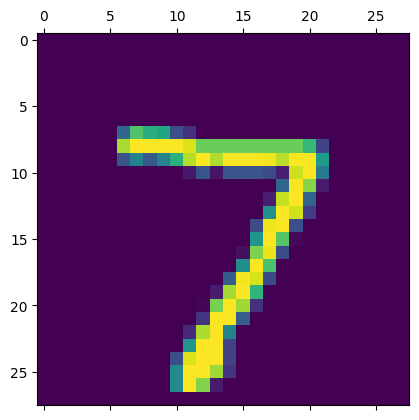

In [ ]:
plt.matshow(x_test[0])

In [ ]:
#Predict2
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 0, 1, 0, 0]

In [ ]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    0,    1,    0,    0,    0,    0],
       [   7, 1127,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 667,  223,  136,    2,    4,    0,    0,    0,    0,    0],
       [ 532,  163,  213,  102,    0,    0,    0,    0,    0,    0],
       [ 269,   74,  118,  178,  343,    0,    0,    0,    0,    0],
       [ 569,   33,   92,  116,   54,   27,    0,    0,    1,    0],
       [ 654,  115,  185,    2,    1,    0,    1,    0,    0,    0],
       [ 262,  117,  332,  293,   10,    3,    0,   10,    1,    0],
       [ 450,  308,  181,   20,   12,    3,    0,    0,    0,    0],
       [ 140,   99,  183,  432,  147,    0,    0,    7,    0,    1]],
      dtype=int32)>

(Text(0.5, 47.7222222222222, 'Prediction'),
 Text(58.222222222222214, 0.5, 'Acture'))

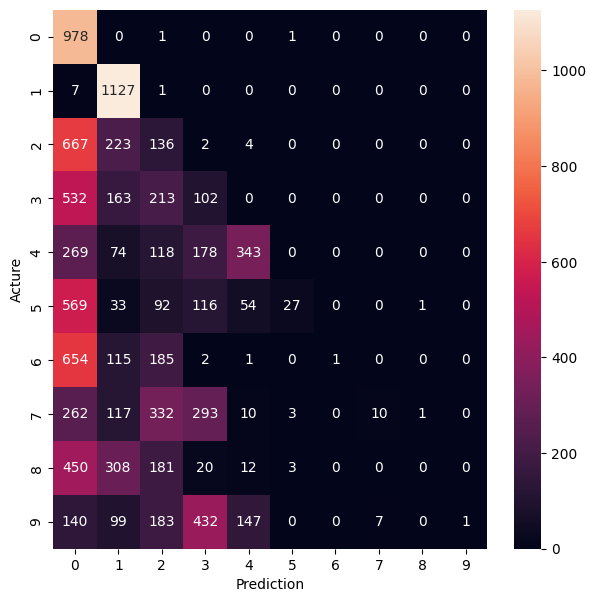

In [ ]:
import seaborn as sn

plt.figure(figsize=(7,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction'), plt.ylabel('Acture')

## Using hidden layer

In [ ]:
#Using hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='relu')])

#Compile (Loss function and Optimizer)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 7.7623 - accuracy: 0.1781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2830 - accuracy: 0.1325
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3061 - accuracy: 0.1056
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3088 - accuracy: 0.0996
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3088 - accuracy: 0.0996


In [ ]:
print(x_test.shape)
print(x_test.dtype)

print(y_test.shape)
print(y_test.dtype)

(10000, 28, 28)
uint8
(10000,)
uint8


In [ ]:
#Model Evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3086 - accuracy: 0.0983


[2.3085777759552, 0.09830000251531601]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

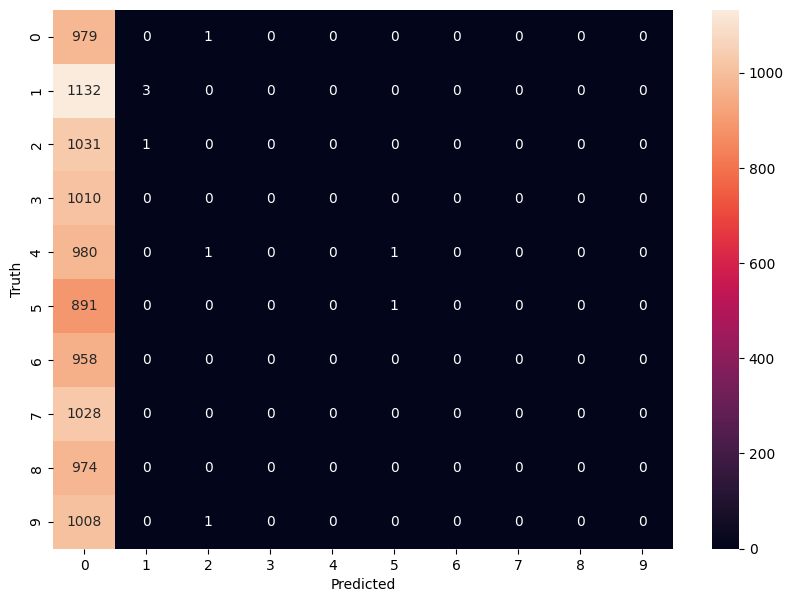

In [ ]:
#Predict ans Create heatmap
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')